# Python exercise 'estimate gradient’ 

## Import Statements

In [180]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import random
import seaborn as sns

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats 
from sklearn.datasets import make_regression 


## Part 1

Pick three vectors from the table, using letters from your names and using each column.

In [16]:
# We pick C, K and A from Cathy and Kai
u = np.array([19., 41.]) # from C
v = np.array([86., 6.])  # from K
w = np.array([56., 20.]) # from A

Define the distance between two vectors as x, u as:
Dist (x,u)= (x1-u1)^2+(x2-u2)^2

Define the similarity function:
Diff(x) = ln(1+Dist(u,x))+ln(1+Dist(v,x))+ln(1+Dist(w,x))

Diff(x) is the distance between person x and your focus group of three people.



In [17]:
def dist(x,u):
    #return (x[0]-u[0])**2 + (x[1]-u[1])**2
    return np.sum((x - u) ** 2)

def diff(x):
    return np.log((1 + dist (u, x))) + np.log((1 + dist (v, x))) + np.log((1 + dist (w, x)))

## Part 2

Compute Diff(x) for 20 random points. 

What is the average value of Diff?
What is the lowest and highest value you found?


In [50]:
diffs = []

for i in range(20):
    #based on the values in the table I decided to pick a random number between 0 and 100
    diffs.append(diff(np.array([float(random.randrange(100)), float(random.randrange(100))]))) 

print(diffs)
print(f"Average: {np.mean(diffs)}, Lowest Value: {min(diffs)}, Highest Value: {max(diffs)}")

[23.432541312892724, 27.2697312190068, 25.495868923511708, 24.115705859328756, 25.66897812793738, 26.021998594367712, 21.923568377587287, 25.753389577989367, 21.161884615870406, 20.203451456749683, 21.127786226948917, 21.411062587951918, 23.70277849050528, 19.561680342195643, 26.012782463313393, 23.128624296482254, 23.496383712659796, 19.815688294744128, 26.31414141777867, 26.456800081244168]
Average: 23.6037422989533, Lowest Value: 19.561680342195643, Highest Value: 27.2697312190068


**Is random search a good way to minimize this function?**

No.

We have to hope that we randomly stumple across the vector with the minimum distance in our sample. 

We have no way of verifying if the lowest value we found is the minimum value.



## Part 3

Set x0=(50,50). Compute Diff(x)=Diff(50,50).

In [53]:
x0 = np.array([50., 50.])
diff_x0 = diff(x0)

print(x0)
print(diff_x0)

[50. 50.]
21.873705514964627


## Part 4

Create a function to compute and print the gradient of Diff by using a small delta=0.001.

In [120]:
def gradient(x, delta=.001):
    start = diff(x)
    result = []
    for i in range(len(x)):
        #change each number in x by delta
        x[i] += delta
        step = diff(x)
        result.append((step - start)/delta)
        x[i] -= delta
    return np.array(result)

## Part 5

Use this function to print the gradient at (0,0), (100,0), (0,100) and (100,100). 

In [154]:
points = np.array([[0., 0.],[100., 0.],[0., 100.],[100., 100.]])

for point in points:
    print(f"Gradient at {point}\tis {gradient(point)}")


Gradient at [0. 0.]	is [-0.07340544 -0.05306046]
Gradient at [100.   0.]	is [ 0.17747654 -0.07856262]
Gradient at [  0. 100.]	is [-0.03222729  0.05906304]
Gradient at [100. 100.]	is [0.02978588 0.05175347]


**Based on these values, where could be a minimum of Diff?**

The gradient at (0, 0), (0, 100) and (100, 100) is almost 0 so based on just the gradient any of these could be the minimum of Diff

Or more acculately, the gradient at nnonne of these points is 0 so none of them are the minimum.

## Part 6

Define xzero=(50,50) and stepsize=1.0. Make a function to compute xnext by taking e a small step into the opposite direction of the gradient, so that diff decreases. E.g. if the gradient is (0.4,0.6), do xnext=(oldx1-0.4*stepsize,oldx2-0.6*stepsize) 

In [155]:
def xnext(x,stepsize):
    return x - stepsize*gradient(x)


xzero = np.array([50.,50.])
stepsize = 1
print(xnext(xzero,stepsize))

[49.97563302 49.89148887]


## Part 7

Repeat this multiple times (make a function to do this automatically) and print x and Diff(x) at each step. You may need to adjust stepsize if you overshoot or are not moving at all. Try to reach a local minimum.

In [276]:
def move_with_constant_stepsize(x = xzero, stepsize = 3.5, number_of_steps = 100):
    for i in range (number_of_steps):
        print(f"The diff at {x}\t is {diff(x)}")
        x = xnext(x, stepsize)

def move_with_changing_stepsize(x = xzero, initial_step_size = 128, allowed_error = 0.01):
    print(f"The diff at {x}\t is {diff(x)}")
    stepsize = initial_step_size
    while stepsize > allowed_error:
        diff_before_step = diff(x)
        new_x = xnext(x, stepsize)
        diff_after_step = diff(new_x)

        if diff_after_step >= diff_before_step:
            #bad step
            stepsize = stepsize/2
        else:
            #good step
            x = new_x
            print(f"The diff at {x}\t is {diff(x)}")
            
move_with_changing_stepsize()


The diff at [50. 50.]	 is 21.873705514964627
The diff at [46.88102619 36.1105756 ]	 is 20.32612702442386
The diff at [48.88394461 22.50949399]	 is 18.58816627086337
The diff at [56.63646668 20.05443241]	 is 14.83523134797533
The diff at [55.74694056 19.97247729]	 is 14.568150619926284
The diff at [56.23489412 20.02154078]	 is 14.552880744329428
The diff at [55.80321026 19.97686046]	 is 14.543125257653882
The diff at [56.19457751 20.01859679]	 is 14.536791076544677
The diff at [55.83297902 19.97898652]	 is 14.5321582682628
The diff at [56.17048987 20.01697743]	 is 14.528564347005055
The diff at [55.85240793 19.98025661]	 is 14.5258837952615
The diff at [56.1538766  20.01595539]	 is 14.523513658110202
The diff at [55.86644904 19.98109186]	 is 14.52179288000784
The diff at [56.1414773  20.01526286]	 is 14.520081843061535
The diff at [55.87724078 19.98167118]	 is 14.518905131964356
The diff at [56.13174268 20.01477413]	 is 14.5175924227614
The diff at [55.88588697 19.98208553]	 is 14.51675

## Part 8



Repeat step 7 with starting points (0,0) and (100,100). Do you always end up at the same point?

In [277]:
move_with_changing_stepsize(x=np.array([0., 0.]))

The diff at [0. 0.]	 is 24.706893608748395
The diff at [9.39589598 6.79173868]	 is 23.580238969127137
The diff at [19.7652943  15.12898203]	 is 22.112756737641774
The diff at [30.19979767 25.41044066]	 is 20.615374585905087
The diff at [36.02189671 32.79863302]	 is 20.291680621834573
The diff at [36.89675742 30.72022638]	 is 20.246355614866587
The diff at [40.49478478 29.0829052 ]	 is 20.05078109496919
The diff at [48.12754825 24.67741423]	 is 18.944999853839768
The diff at [59.37915223 18.15365189]	 is 17.190459819478647
The diff at [52.94126314 21.77184825]	 is 17.132990196164197
The diff at [56.60524811 19.68491504]	 is 14.874447393167586
The diff at [55.79460686 20.11109121]	 is 14.558082986510321
The diff at [56.19649866 19.8974262 ]	 is 14.54690399289752
The diff at [55.83544021 20.08941619]	 is 14.53887698972946
The diff at [56.16583146 19.91358954]	 is 14.533791773322523
The diff at [55.85878452 20.07704715]	 is 14.52961341678999
The diff at [56.1465634  19.92374012]	 is 14.526

In [278]:
move_with_changing_stepsize(x=np.array([100., 100.]))

The diff at [100. 100.]	 is 27.351729688953796
The diff at [96.1874075 93.3755559]	 is 26.87904724825465
The diff at [92.10998157 86.2611196 ]	 is 26.33243974066239
The diff at [87.71446576 78.54518952]	 is 25.687631414082233
The diff at [82.93163262 70.07177795]	 is 24.907649003812985
The diff at [77.67277057 60.6135965 ]	 is 23.933275667038593
The diff at [71.83051738 49.8186777 ]	 is 22.661501930408285
The diff at [65.27474533 37.05372077]	 is 20.851956862821634
The diff at [57.30479816 20.2685717 ]	 is 15.50447620681233
The diff at [55.45485137 19.86887519]	 is 14.782494341838227
The diff at [56.29714471 20.06682028]	 is 14.586694792713924
The diff at [55.76672793 19.94046756]	 is 14.561387875767748
The diff at [56.2204334  20.05038555]	 is 14.548888667840048
The diff at [55.8142466  19.95063034]	 is 14.540692707343348
The diff at [56.18524543 20.0430787 ]	 is 14.535030256417107
The diff at [55.84084144 19.95612384]	 is 14.530956036337125
The diff at [56.16344773 20.03869294]	 is 1

## Part 9

Make the nicest possible chart using mathplotlib that shows what the Diff function looks like (note: if you find this challenging, you can first make a one-dimensional chart by computing it for (x,40) so the second variable has a fixed value 40). 

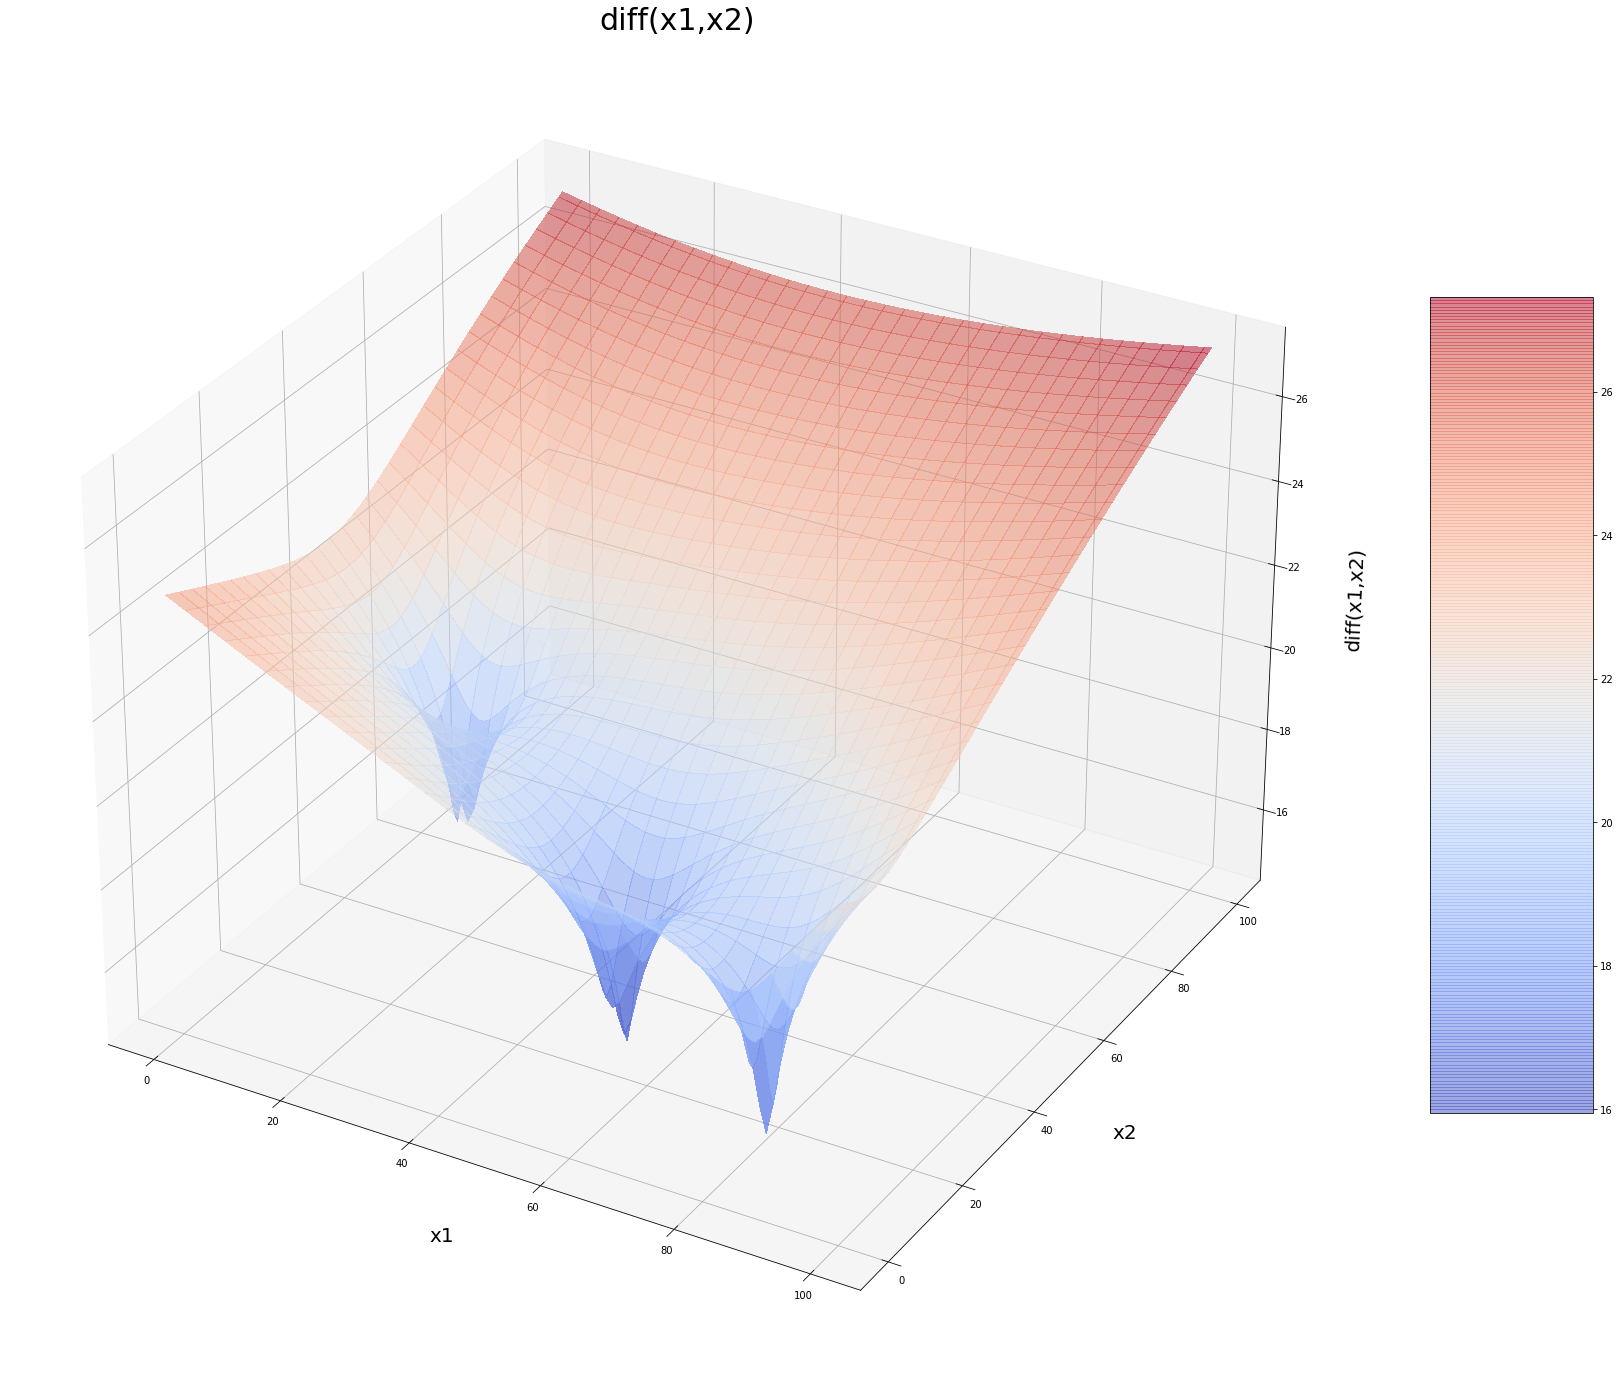

In [322]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')


# Make data.
xs = ys = np.arange(0, 101, 1)
X, Y = np.meshgrid(x, y)
zs = np.array([diff(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.5)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#axes labels
ax.set_xlabel('x1', labelpad=30, fontsize=20,)
ax.set_ylabel('x2', labelpad=30, fontsize=20)
ax.set_zlabel('diff(x1,x2)', labelpad=30, fontsize=20)

plt.title("diff(x1,x2)", fontsize=30)
plt.show()

## Part 10

Show the gradient field as well in a chart. Use a new plot or add the gradient to the original plot.

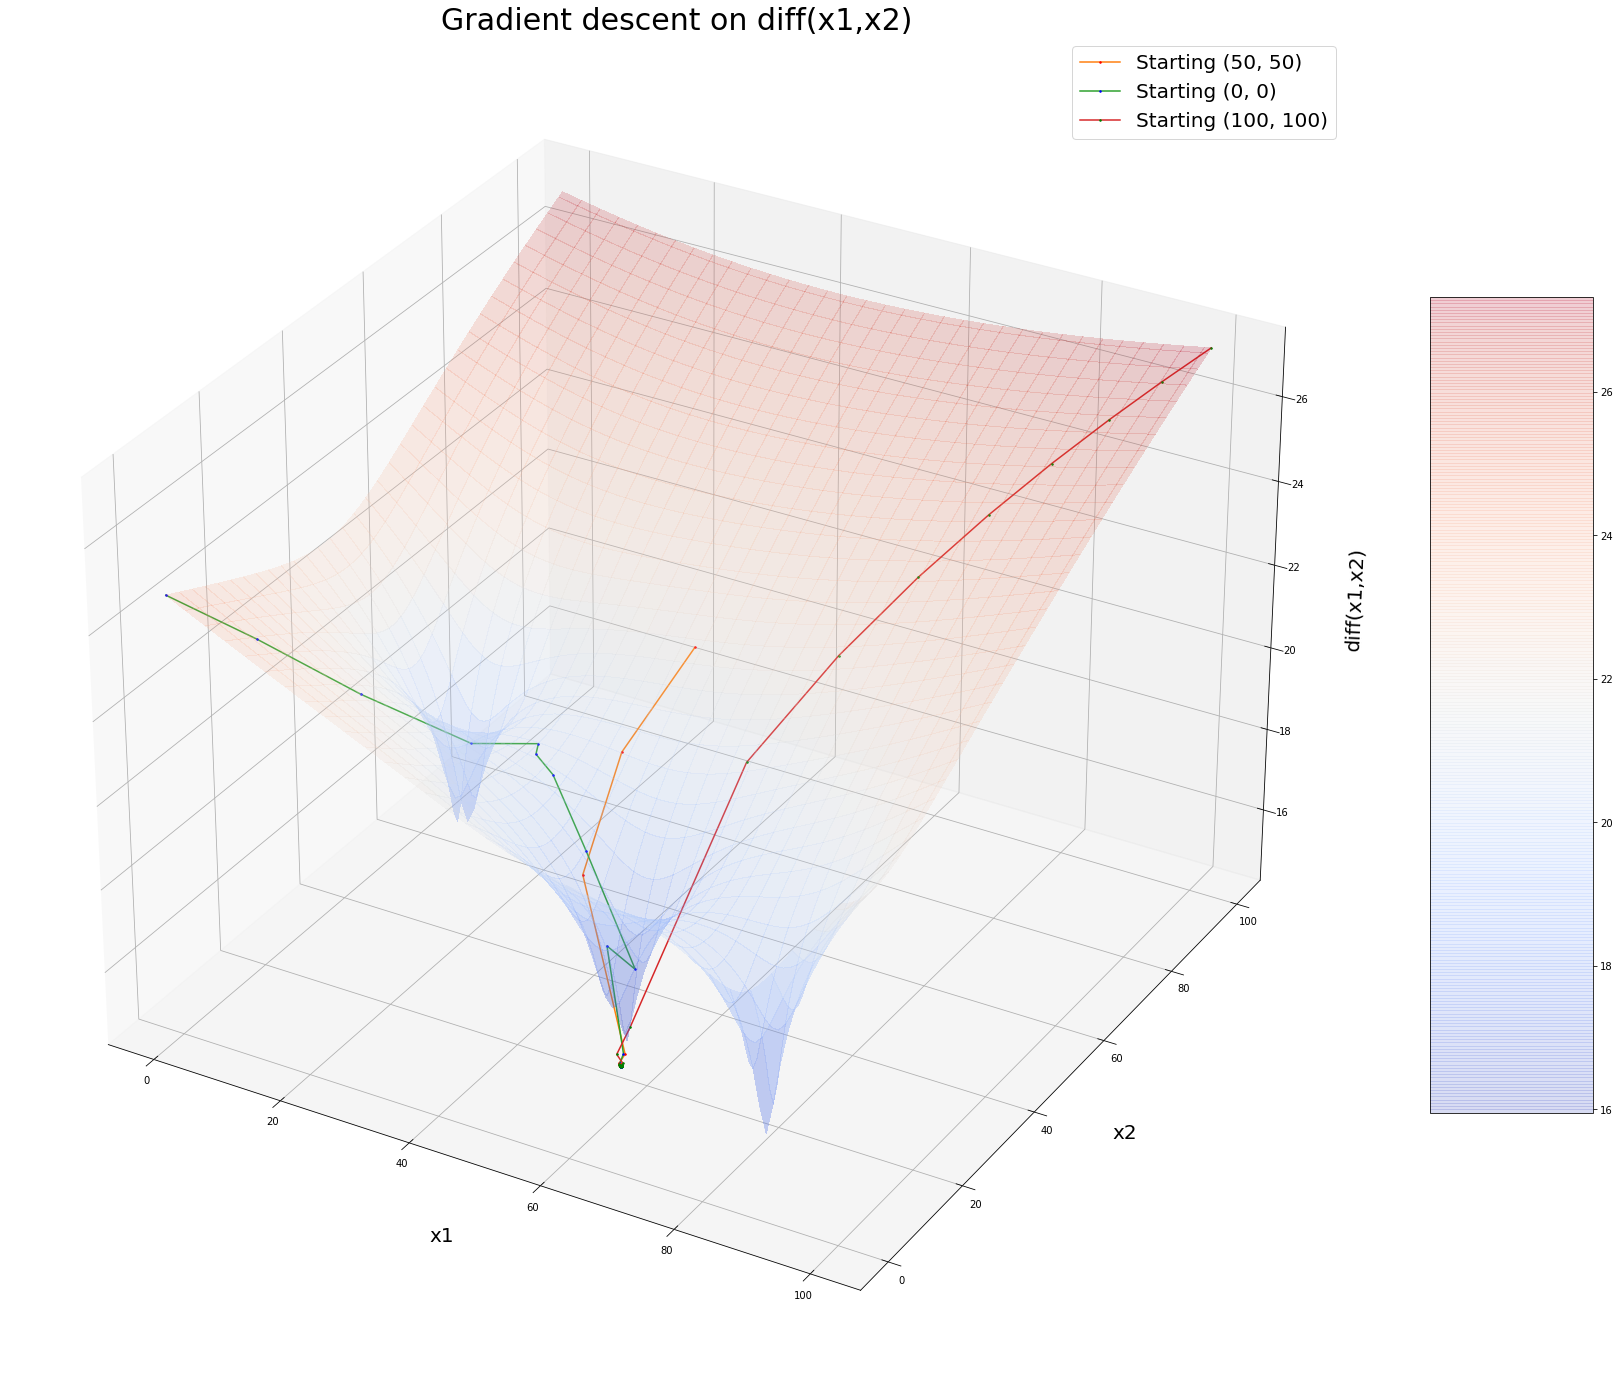

In [323]:
def get_steps(x = xzero, initial_step_size = 128, allowed_error = 0.01):
    result = [[x[0]], [x[1]], [diff(x)]]
    stepsize = initial_step_size
    while stepsize > allowed_error:
        diff_before_step = diff(x)
        new_x = xnext(x, stepsize)
        diff_after_step = diff(new_x)

        if diff_after_step >= diff_before_step:
            #bad step
            stepsize = stepsize/2
        else:
            #good step
            x = new_x
            result[0].append(x[0])
            result[1].append(x[1])
            result[2].append(diff_after_step)
    return result


fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')

# Make data.
xs = ys = np.arange(0., 101., 1.)
X, Y = np.meshgrid(x, y)
zs = np.array([diff(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#axes labels
ax.set_xlabel('x1', labelpad=30, fontsize=20,)
ax.set_ylabel('x2', labelpad=30, fontsize=20)
ax.set_zlabel('diff(x1,x2)', labelpad=30, fontsize=20)

#gradient descent
steps = get_steps()
ax.plot(steps[0], steps[1], steps[2], markerfacecolor='r', markeredgecolor='r', marker='.', markersize=3, label='Starting (50, 50)')
steps = get_steps(x = np.array([0., 0.]))
ax.plot(steps[0], steps[1], steps[2], markerfacecolor='b', markeredgecolor='b', marker='.', markersize=3, label='Starting (0, 0)')
steps = get_steps(x = np.array([100., 100.]))
ax.plot(steps[0], steps[1], steps[2], markerfacecolor='g', markeredgecolor='g', marker='.', markersize=3, label='Starting (100, 100)')


ax.legend(fontsize=20)
plt.title("Gradient descent on diff(x1,x2)", fontsize=30)
plt.show()

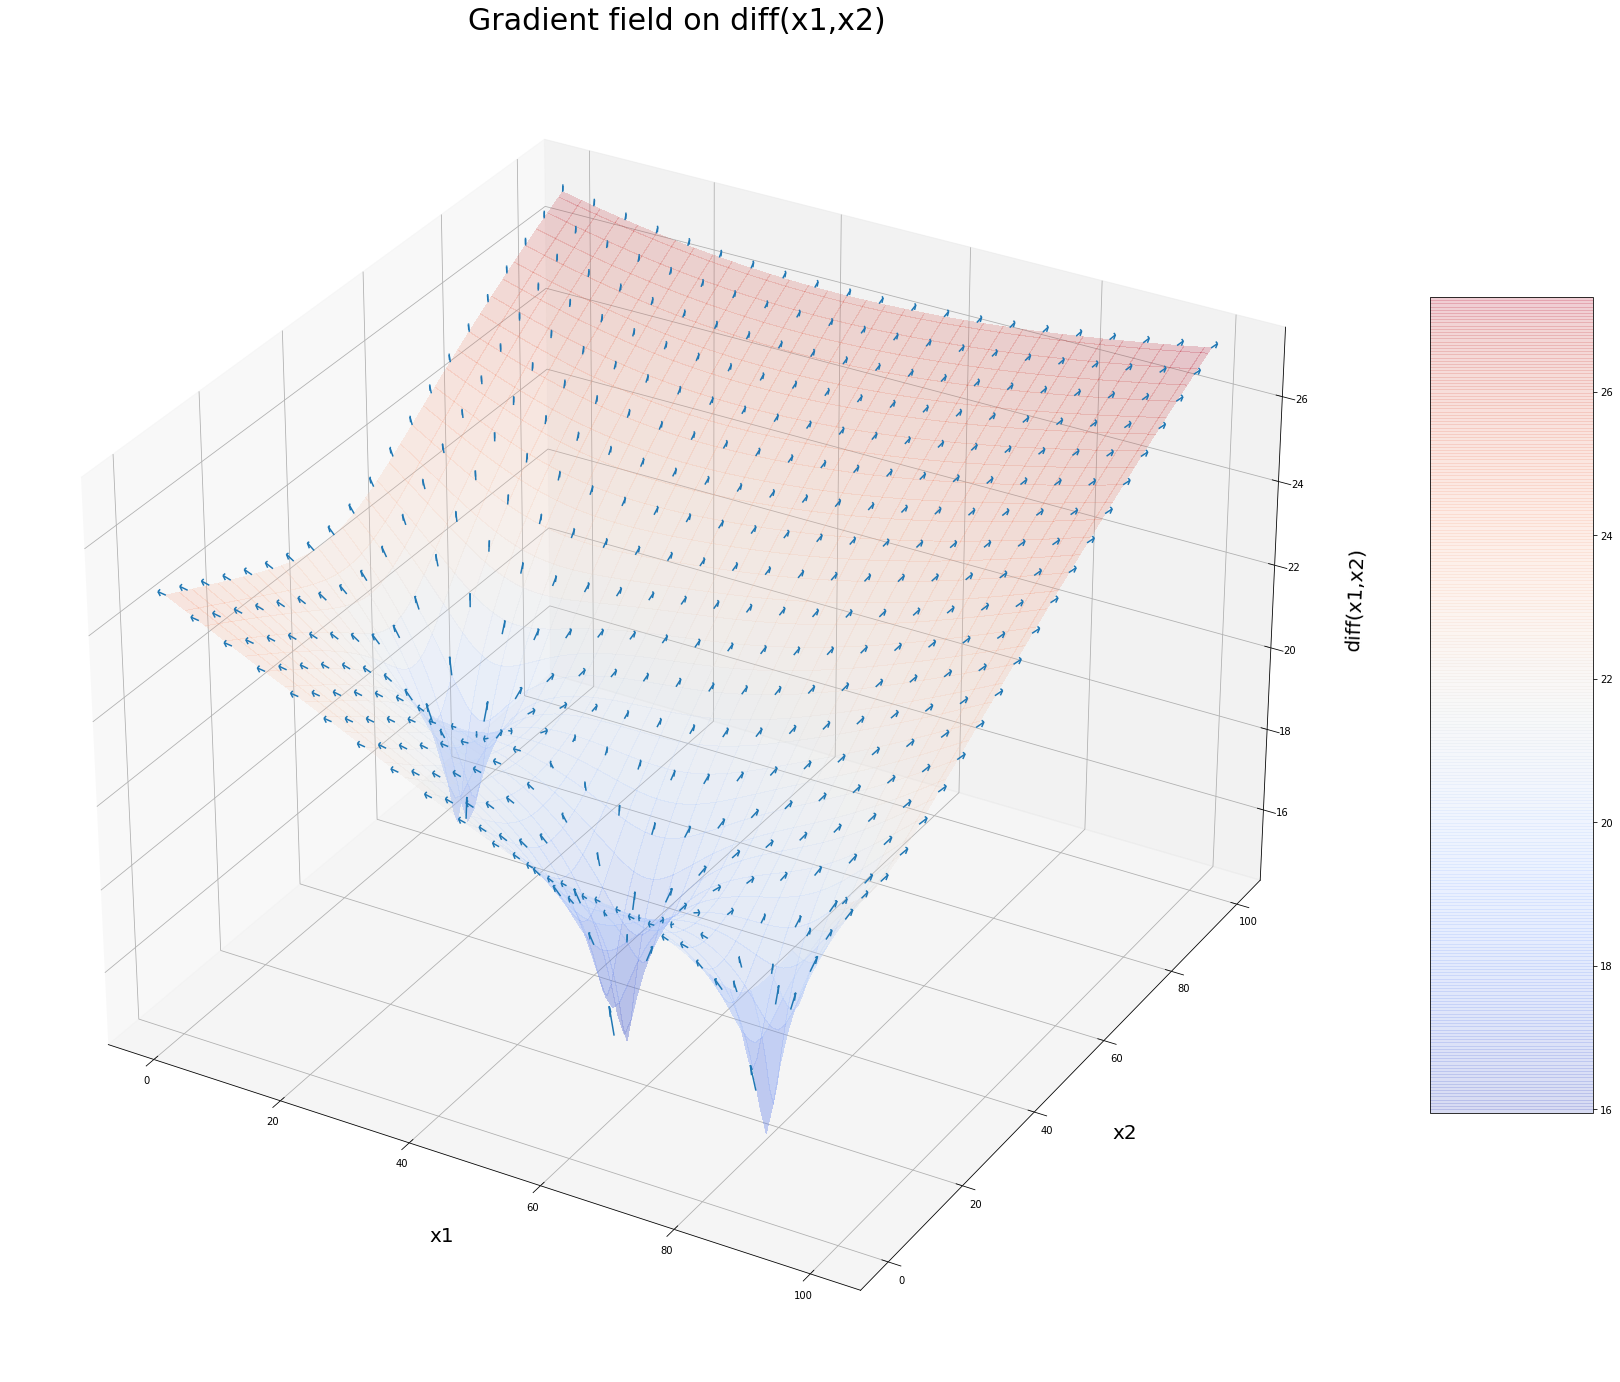

In [324]:
def get_gradients(xs, ys):
    result = [[], [], [], [], [], []]
    for x in xs:
        for y in ys:
            result[0].append(x)
            result[1].append(y)
            result[2].append(diff(np.array([x, y])))
            g = gradient(np.array([x, y]))
            result[3].append(g[0])
            result[4].append(g[1])
            result[5].append(diff(xnext(np.array([x, y]), -1)) - diff(np.array([x, y])))
            #print(f'{g[0]}; {g[1]}; {diff(np.array(x+g[0], y+g[1])) - diff(np.array([x, y]))}')
    return result


fig = plt.figure(figsize=(30,30))
ax = fig.gca(projection='3d')

# Make data.
xs = ys = np.arange(0., 101., 5.)
X, Y = np.meshgrid(x, y)
zs = np.array([diff(np.array([x,y])) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#axes labels
ax.set_xlabel('x1', labelpad=30, fontsize=20,)
ax.set_ylabel('x2', labelpad=30, fontsize=20)
ax.set_zlabel('diff(x1,x2)', labelpad=30, fontsize=20)

#gradient
gradients = get_gradients(xs, ys)
ax.quiver(gradients[0], gradients[1], gradients[2], gradients[3], gradients[4], gradients[5], length=1, normalize=True)

plt.title("Gradient field on diff(x1,x2)", fontsize=30)
plt.show()